#Stack 3 Belt Exam

Susan Shin

#Clustering

##Load and Explore

In [1763]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [1831]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [1764]:
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/sample_data/option_A_clustering_df - option_A_clustering_df.csv'
df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122.184194,47.730389


In [1765]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [1766]:
df.duplicated().sum()

29

In [1767]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [1768]:
df.isna().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

In [1769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4915 non-null   int64  
 1   SqFt1stFloor        4915 non-null   int64  
 2   SqFtHalfFloor       4915 non-null   int64  
 3   SqFt2ndFloor        4915 non-null   int64  
 4   SqFtUpperFloor      4915 non-null   int64  
 5   SqFtTotLiving       4915 non-null   int64  
 6   SqFtTotBasement     4915 non-null   int64  
 7   SqFtFinBasement     4915 non-null   int64  
 8   SqFtGarageBasement  4915 non-null   int64  
 9   SqFtGarageAttached  4915 non-null   int64  
 10  DaylightBasement    4915 non-null   int64  
 11  SqFtOpenPorch       4915 non-null   int64  
 12  SqFtEnclosedPorch   4915 non-null   int64  
 13  SqFtDeck            4915 non-null   int64  
 14  BrickStone          4915 non-null   int64  
 15  Bedrooms            4915 non-null   int64  
 16  BathHa

In [1770]:
df.describe()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4.915000e+03,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,6.645444e+05,1179.083418,51.959919,347.439064,26.524517,1937.448627,596.627874,334.984334,102.333672,170.879959,0.373143,55.402035,8.236623,148.607121,4.441913,3.379451,0.387792,0.627263,1.320244,1971.915768,-122.271623,47.572308
std,2.985774e+05,444.925946,174.811762,544.865685,114.672475,765.663840,567.978214,423.696071,187.330438,239.934554,0.483689,95.997155,37.495879,201.620800,18.695589,0.945969,0.506142,0.652341,0.610240,32.816671,0.086500,0.127344
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,-122.526072,47.213547
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1952.000000,-122.346012,47.488558
50%,6.300000e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1966.000000,-122.291694,47.576855
75%,7.899500e+05,1450.000000,0.000000,580.000000,0.000000,2370.000000,1070.000000,570.000000,190.000000,400.000000,1.000000,80.000000,0.000000,250.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2015.000000,-122.192353,47.680911
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,1.000000,1060.000000,620.000000,1940.000000,100.000000,8.000000,3.000000,4.000000,5.000000,2019.000000,-122.090088,47.777422


##Model

In [1771]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,-0.886106,0.923656,-0.297264,-0.637725,-0.23133,1.623007,1.749140,2.962367,-0.546329,1.788670,1.296123,-0.056279,-0.21969,0.354131,-0.237616,2.770511,-0.766251,2.104538,-0.524838,-0.210761,0.869736,-1.854932
1,-0.637402,0.474097,-0.297264,-0.637725,-0.23133,0.342942,0.375708,1.121238,-0.546329,-0.712267,1.296123,-0.577180,-0.21969,0.949368,-0.237616,0.656060,1.209680,-0.961655,-0.524838,-0.820269,-1.043917,-0.490331
2,0.011407,-0.380065,-0.297264,2.143060,-0.23133,0.767453,-1.050548,-0.790705,-0.546329,0.955024,-0.771532,1.162632,-0.21969,-0.737137,-0.237616,0.656060,1.209680,-0.961655,1.114030,1.434912,1.328909,-1.058280
3,-0.018571,-1.166792,-0.297264,0.353446,-0.23133,-0.153410,0.041154,0.672757,-0.546329,-0.712267,1.296123,-0.577180,-0.21969,-0.241106,-0.237616,-0.401165,1.209680,-0.961655,1.114030,1.343485,-1.140326,-0.056249
4,-0.026945,2.542067,-0.297264,-0.637725,-0.23133,0.486623,-1.050548,-0.790705,-0.546329,1.121753,-0.771532,-0.160459,-0.21969,0.850162,-0.237616,-0.401165,-0.766251,-0.961655,1.114030,-0.149810,1.010839,1.241497


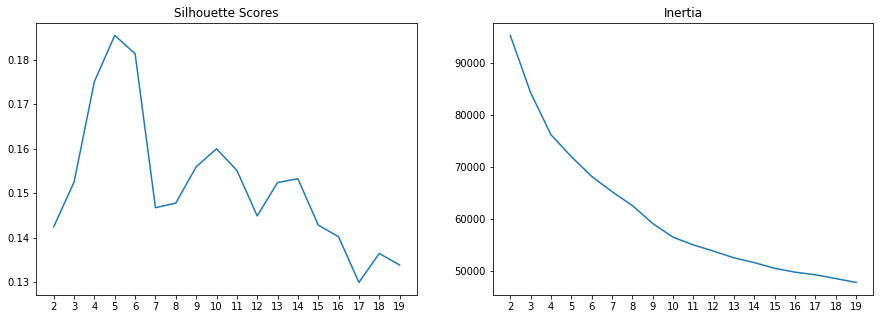

In [1772]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,20)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

The highest silhouette score looks to be around 5, while we see definite elbowing around 4 for Intertia. Since these two scores don't line up exactly I will make the decision to use 4 since it feels that is the best of both worlds in terms of scores.

In [1773]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,cluster
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122.196399,47.336118,2
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122.361913,47.509874,2
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122.156684,47.437557,3
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122.370252,47.565146,1
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122.184194,47.730389,0


In [1774]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,0,535441.334704,1198.650386,95.829306,64.987147,0.000000,1440.407712,361.093573,84.719794,28.699229,155.235476,0.063239,41.640103,7.681234,66.243188,4.946015,3.019023,0.213882,0.283805,1.093059,1947.292545,-122.285139,47.557191
1,1,700563.034898,562.196149,6.309266,556.848375,148.950662,1537.246691,375.456077,266.551143,104.377858,10.611312,0.593261,25.819495,16.281588,299.560770,0.481348,2.753309,0.529483,0.903730,1.245487,2015.955475,-122.332683,47.615999
2,2,716037.064815,1418.153846,29.830484,70.339031,0.000000,2334.504274,1248.960826,816.558405,238.179487,135.510684,0.814815,40.233618,5.920940,203.675926,8.089031,3.804131,0.390313,0.945869,1.296296,1963.502849,-122.254255,47.581344
3,3,867099.687075,1368.091156,29.755102,1387.436735,8.965986,2946.763265,223.882993,154.715646,35.385034,461.043537,0.100680,154.240816,5.034014,90.700680,0.619048,4.229932,0.682993,0.614966,2.051701,2003.353741,-122.199998,47.545655


## Visuals

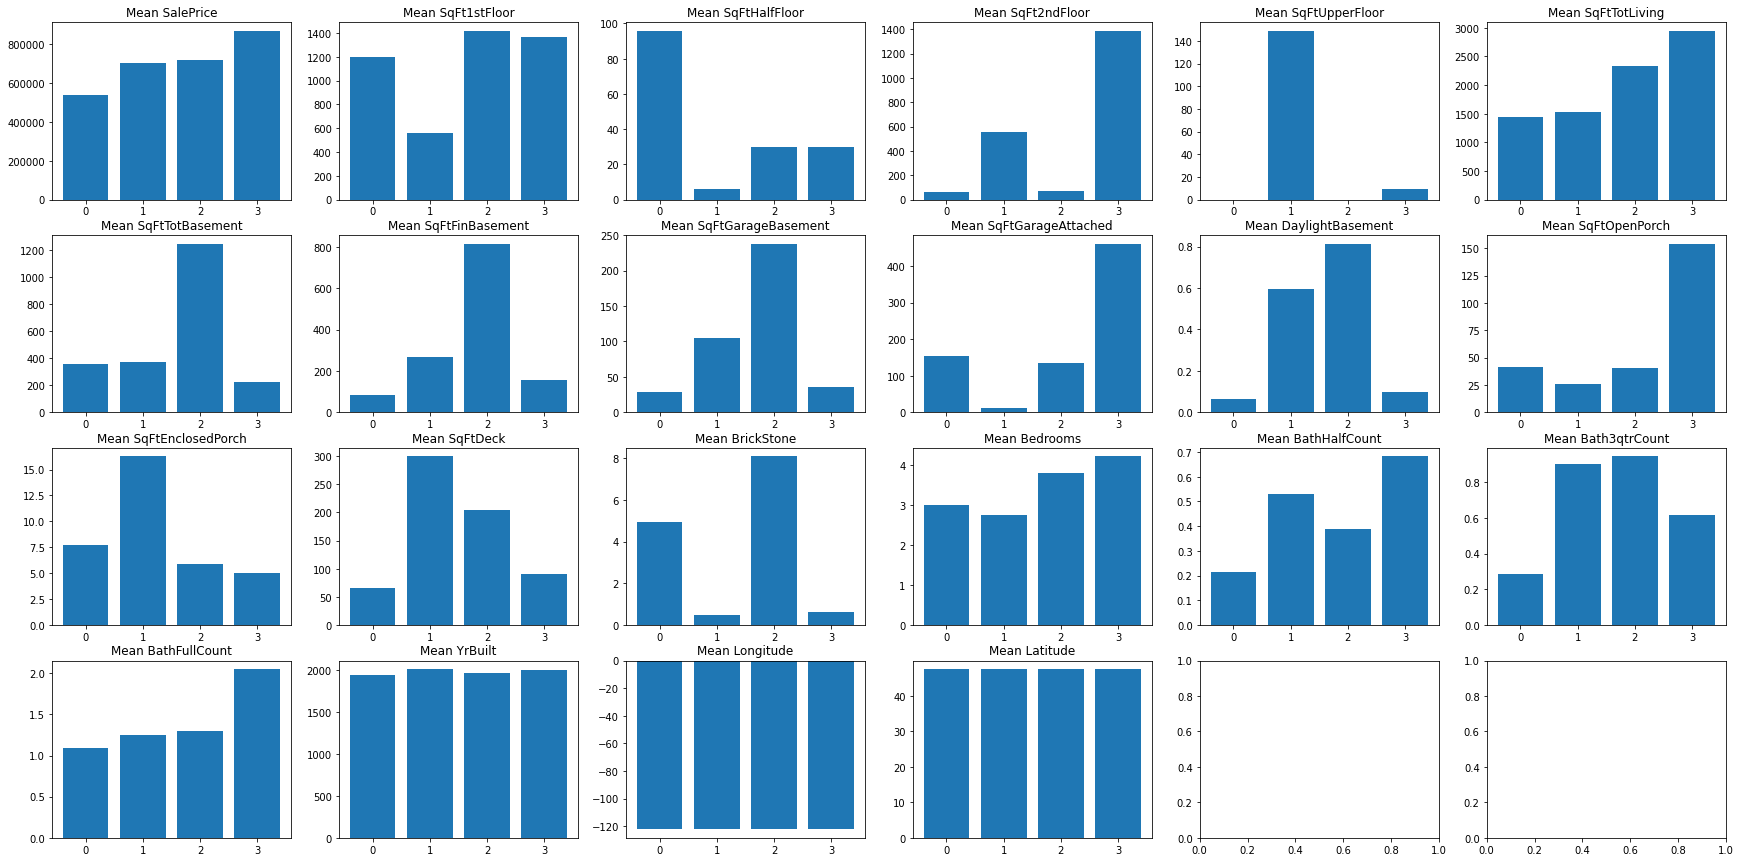

In [1775]:
# Visualize means 
fig, axes = plt.subplots(4,6, figsize = (30, 15))

axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

## Cluster Analysis

Group 0: The Cozy Home

*  I am calling this the cozy home group, because it's the most affordable group of houses amongst the clusters of homes. 
* This group of homes have the lowest selling price but it also has the smallest living space overall (living, basement, outdoor space).
* This group of homes also has the lowest number of bathrooms.
* Ideal buyers for these homes would be those on a budget or looking for a starter home.

Group 1: The Outdoor Lover

* I am calling this group the Outdoor Lover because this group of homes, while not having the biggest living square footage, has the largest porch/deck space of all the clusters.
* The average price for these homes are more expensive than the Cozy Home Group given the bigger space for group dewlling.
* Ideal buyers would be those who may not need a lot of living space, but want to spend a lot of times outdoors.


Group 2: The Grounded

* This group of homes are called the Grounded homes because a large part of the livable space is in it's finished basement as well as it's garage.
* This group of homes are good for those who want to have a some sort of entertainment space or even possibly someone living in the basement.
* The price for these homes are close to the Outdoor Lover homes - which leads me to believe that outdoor space vs. basement space could possibly be interchangeable from a selling price perspective.


Group 3: Living Large

* This group is the most expensive of all of the groups.
* It has the largest living space over all, the higest number of bedrooms and bathrooms.
* This group of homes are for the people who want a lot of living space. Possibly for bigger families.
* It also looks like basements and deck space are not as important, however they do enjoy and outdoor porch.

Some things I also wanted to point out:

*   All the clusters seem to be built in close proximity to each other, so year built isn't as much of a factor for these clustrs.



## Cluster Visuals

###Visuals 1

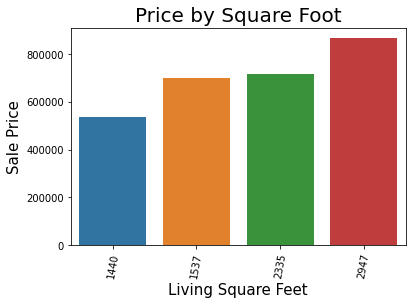

In [1776]:
bar = sns.barplot(data = cluster_groups, x = "SqFtTotLiving", y = "SalePrice")
plt.title("Price by Square Foot", size = 20)
plt.xlabel("Living Square Feet", size = 15)
plt.ylabel("Sale Price", size = 15)
plt.xticks(rotation = 80)
labels = [item.get_text() for item in bar.get_xticklabels()]
bar.set_xticklabels([str(round(float(label))) for label in labels]);

Tick labels: https://stackoverflow.com/questions/29188757/specify-format-of-floats-for-tick-labels

The most obvious difference in sale price between clusters is living square footage.

In the above graph shows as the price increasing as the square footage increases.

While there are other factors that go into how prices fluctuate between clusters, this is definitely the one that has the highest correlation.

###Visuals 2

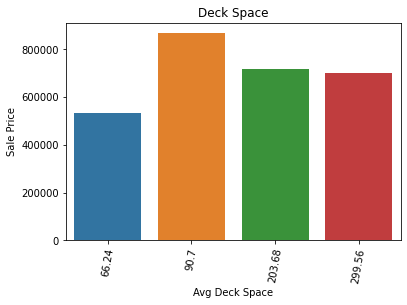

In [1830]:
ax = sns.barplot(data = cluster_groups, x = "SqFtDeck", y = "SalePrice")
plt.title("Deck Space")
plt.xlabel("Avg Deck Space")
plt.ylabel("Sale Price")
plt.xticks(rotation = 80)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels([str(round(float(label), 2)) for label in labels]);

Tick label formatting reference: https://stackoverflow.com/questions/29188757/specify-format-of-floats-for-tick-labels

This particular graph shows each cluster as it relates to deck space. We can see in this graph that as the outdoor space increases, so does the price.

What this graph tells us is that although square footage is a big driver for price, so is non-livable space.

#Modeling

Based on the instructions, this is a regression problem as the aim is to predict how much a house will sell.

###Load & Explore

In [1780]:
#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline

from sklearn import set_config
set_config(display='diagram')

In [1781]:
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/sample_data/option_A_modeling_df - option_A_modeling_df.csv'
df2 = pd.read_csv(filename)
df2.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,PcntComplete,Longitude,Latitude,Golf Course,Other Great Outdoors,Elementary School,General Entertainment,Park,Mexican Restaurant,Vietnamese Restaurant,Gas Station,Housing Development,Playground,Pool,Church,Dive Bar,Convenience Store,Middle School,Grocery Store,Brewery,Bar,Salon / Barbershop,Post Office,Beach,Lake,Medical Center,Sandwich Place,Nail Salon,Pizza Place,Moving Target,Building,Preschool,Library,Trail,Farm,Community Center,High School,Gym / Fitness Center,Bridge,Gym,Supermarket,School,Dance Studio,Athletics & Sports,Garden,Airport,Beer Bar,Dog Run,Pharmacy,Scenic Lookout,Bank,Fast Food Restaurant,Miscellaneous Shop,Pet Store,Doctor's Office,Pub,Coffee Shop,Food Truck,Hardware Store,Bus Stop,Field,Laundry Service,Dentist's Office,Bus Station,Auto Dealership,Veterinarian,Tennis Court,Chinese Restaurant,Furniture / Home Store,Bus Line,Café,Event Space,Italian Restaurant,Marijuana Dispensary,Office,Yoga Studio,Restaurant,Baseball Field,Discount Store,Physical Therapist,American Restaurant,Martial Arts Dojo,Spa,Storage Facility,Daycare,General Travel,Burger Joint,Pet Service,Thai Restaurant,Chiropractor,Bakery,Mobile Phone Shop,Ice Cream Shop,Automotive Shop,Assisted Living,Health & Beauty Service,Fried Chicken Joint,Taco Place,Video Store,Financial or Legal Service,Massage Studio,Asian Restaurant,Insurance Office,Japanese Restaurant,ATM,Locksmith,Shipping Store,BldgGrade_4,BldgGrade_5,BldgGrade_6,BldgGrade_7,BldgGrade_8,BldgGrade_9,BldgGrade_10,BldgGrade_11,BldgGrade_12,FinBasementGrade_3,FinBasementGrade_4,FinBasementGrade_5,FinBasementGrade_6,FinBasementGrade_7,FinBasementGrade_8,FinBasementGrade_9,FinBasementGrade_10,HeatSystem_1,HeatSystem_2,HeatSystem_3,HeatSystem_4,HeatSystem_5,HeatSystem_6,HeatSystem_7,HeatSystem_8,Condition_2,Condition_3,Condition_4,Condition_5,MonthSold_02,MonthSold_03,MonthSold_04,MonthSold_05,MonthSold_06,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,0,-122.196399,47.336118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,0,-122.361913,47.509874,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,0,-122.156684,47.437557,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,0,-122.370252,47.565146,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,0,-122.184194,47.730389,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [1782]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', -1)
pd.set_option('display.max_rows', None)

In [1783]:
df2.duplicated().sum()

0

In [1784]:
df2.isna().sum()

SalePrice                     0
SqFt1stFloor                  0
SqFtHalfFloor                 0
SqFt2ndFloor                  0
SqFtUpperFloor                0
SqFtTotLiving                 0
SqFtTotBasement               0
SqFtFinBasement               0
SqFtGarageBasement            0
SqFtGarageAttached            0
DaylightBasement              0
SqFtOpenPorch                 0
SqFtEnclosedPorch             0
SqFtDeck                      0
BrickStone                    0
Bedrooms                      0
BathHalfCount                 0
Bath3qtrCount                 0
BathFullCount                 0
YrBuilt                       0
PcntComplete                  0
Longitude                     0
Latitude                      0
Golf Course                   0
Other Great Outdoors          0
Elementary School             0
General Entertainment         0
Park                          0
Mexican Restaurant            0
Vietnamese Restaurant         0
Gas Station                   0
Housing 

In [1785]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB


In [1786]:
df2.describe()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,PcntComplete,Longitude,Latitude,Golf Course,Other Great Outdoors,Elementary School,General Entertainment,Park,Mexican Restaurant,Vietnamese Restaurant,Gas Station,Housing Development,Playground,Pool,Church,Dive Bar,Convenience Store,Middle School,Grocery Store,Brewery,Bar,Salon / Barbershop,Post Office,Beach,Lake,Medical Center,Sandwich Place,Nail Salon,Pizza Place,Moving Target,Building,Preschool,Library,Trail,Farm,Community Center,High School,Gym / Fitness Center,Bridge,Gym,Supermarket,School,Dance Studio,Athletics & Sports,Garden,Airport,Beer Bar,Dog Run,Pharmacy,Scenic Lookout,Bank,Fast Food Restaurant,Miscellaneous Shop,Pet Store,Doctor's Office,Pub,Coffee Shop,Food Truck,Hardware Store,Bus Stop,Field,Laundry Service,Dentist's Office,Bus Station,Auto Dealership,Veterinarian,Tennis Court,Chinese Restaurant,Furniture / Home Store,Bus Line,Café,Event Space,Italian Restaurant,Marijuana Dispensary,Office,Yoga Studio,Restaurant,Baseball Field,Discount Store,Physical Therapist,American Restaurant,Martial Arts Dojo,Spa,Storage Facility,Daycare,General Travel,Burger Joint,Pet Service,Thai Restaurant,Chiropractor,Bakery,Mobile Phone Shop,Ice Cream Shop,Automotive Shop,Assisted Living,Health & Beauty Service,Fried Chicken Joint,Taco Place,Video Store,Financial or Legal Service,Massage Studio,Asian Restaurant,Insurance Office,Japanese Restaurant,ATM,Locksmith,Shipping Store,BldgGrade_4,BldgGrade_5,BldgGrade_6,BldgGrade_7,BldgGrade_8,BldgGrade_9,BldgGrade_10,BldgGrade_11,BldgGrade_12,FinBasementGrade_3,FinBasementGrade_4,FinBasementGrade_5,FinBasementGrade_6,FinBasementGrade_7,FinBasementGrade_8,FinBasementGrade_9,FinBasementGrade_10,HeatSystem_1,HeatSystem_2,HeatSystem_3,HeatSystem_4,HeatSystem_5,HeatSystem_6,HeatSystem_7,HeatSystem_8,Condition_2,Condition_3,Condition_4,Condition_5,MonthSold_02,MonthSold_03,MonthSold_04,MonthSold_05,MonthSold_06,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
count,4.937000e+03,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.00000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.00

In [1787]:
df2.dtypes

SalePrice                       int64
SqFt1stFloor                    int64
SqFtHalfFloor                   int64
SqFt2ndFloor                    int64
SqFtUpperFloor                  int64
SqFtTotLiving                   int64
SqFtTotBasement                 int64
SqFtFinBasement                 int64
SqFtGarageBasement              int64
SqFtGarageAttached              int64
DaylightBasement                int64
SqFtOpenPorch                   int64
SqFtEnclosedPorch               int64
SqFtDeck                        int64
BrickStone                      int64
Bedrooms                        int64
BathHalfCount                   int64
Bath3qtrCount                   int64
BathFullCount                   int64
YrBuilt                         int64
PcntComplete                    int64
Longitude                     float64
Latitude                      float64
Golf Course                     int64
Other Great Outdoors            int64
Elementary School               int64
General Ente

In [1788]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [1789]:
# split X and y
X = df2.drop(columns=['SalePrice'])
y = df2['SalePrice']

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1790]:
pca = PCA(n_components=.95)
pipe = make_pipeline(scaler, pca)

In [1791]:
pipe.fit(X_train)
X_train_proc = pipe.transform(X_train)
X_test_proc = pipe.transform(X_test)
 
X_train_proc.shape

(3702, 143)

In [1792]:
X_train.shape

(3702, 170)

Confimring PCA reduced features!

##Model 1 - Base Model

I am going to start with a high amount of layers and nodes because I want to see how accurate I can get.

I will also add early stopping on all the models as a form of regulation.

In [1793]:
# create model architecture
input_dim = X_train_proc.shape[1]
 
reg_model = Sequential()
 
reg_model.add(Dense(500, input_dim=input_dim, activation='relu'))
reg_model.add(Dense(500, activation='relu'))
reg_model.add(Dense(1000, activation='relu'))
reg_model.add(Dense(1000, activation='relu'))
reg_model.add(Dense(1000, activation='relu'))
reg_model.add(Dense(1, activation='linear'))
 
reg_model.summary()

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_420 (Dense)           (None, 500)               72000     
                                                                 
 dense_421 (Dense)           (None, 500)               250500    
                                                                 
 dense_422 (Dense)           (None, 1000)              501000    
                                                                 
 dense_423 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_424 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_425 (Dense)           (None, 1)                 1001      
                                                                 
Total params: 2,826,501
Trainable params: 2,826,501
N

In [1794]:
# compile model with additional metrics
reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [1795]:
early_stopping = EarlyStopping(patience = 5)

history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=200,
                        callbacks = [early_stopping],
                        verbose=0)

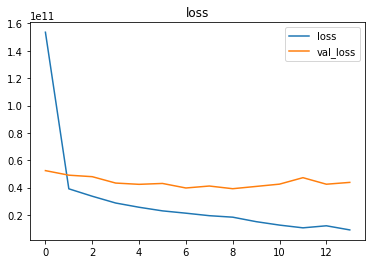

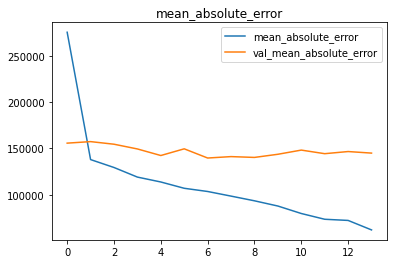

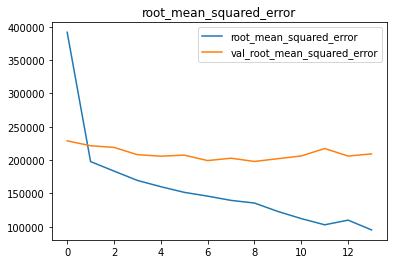

In [1796]:
# plot learning
plot_history(history);

In [1797]:
# evaluate model 
y_pred = reg_model.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

39/39 [==============================] - 0s 9ms/step
final RMSE: 209351.11874785912
final MAE: 145007.02513917003
final MAPE: 0.25991761007807096
final R2: 0.498513107181912


##Model 2 - Reduce Nodes

The above model is slightly over fit.

Therefore I will reduce the number of nodes to see if this will help.

In [1798]:
# create model architecture
input_dim = X_train_proc.shape[1]
 
reg_model = Sequential()
 
reg_model.add(Dense(100, input_dim=input_dim, activation='relu'))
reg_model.add(Dense(100, activation='relu'))
reg_model.add(Dense(100, activation='relu'))
reg_model.add(Dense(100, activation='relu'))
reg_model.add(Dense(100, activation='relu'))
reg_model.add(Dense(1, activation='linear'))
 
reg_model.summary()

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_426 (Dense)           (None, 100)               14400     
                                                                 
 dense_427 (Dense)           (None, 100)               10100     
                                                                 
 dense_428 (Dense)           (None, 100)               10100     
                                                                 
 dense_429 (Dense)           (None, 100)               10100     
                                                                 
 dense_430 (Dense)           (None, 100)               10100     
                                                                 
 dense_431 (Dense)           (None, 1)                 101       
                                                                 
Total params: 54,901
Trainable params: 54,901
Non-tra

In [1799]:
# compile model with additional metrics
reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [1800]:
early_stopping = EarlyStopping(patience = 5)

history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=200,
                        callbacks = [early_stopping],
                        verbose=0)

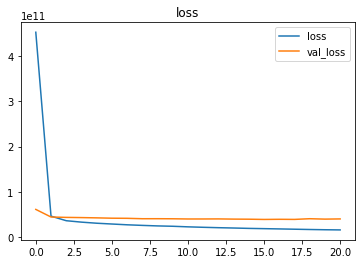

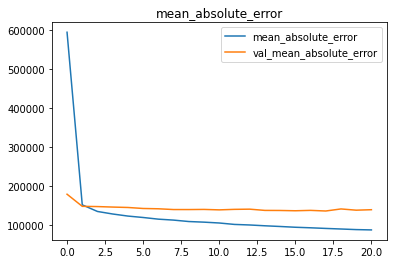

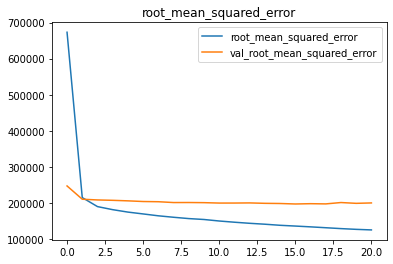

In [1801]:
# plot learning
plot_history(history);

In [1802]:
# evaluate model 
y_pred = reg_model.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

39/39 [==============================] - 0s 2ms/step
final RMSE: 200113.44179687198
final MAE: 140357.67107793523
final MAPE: 0.25674499825934977
final R2: 0.5417931920959176


##Model 3 - Add Drop Out

The above model improved mape from 24% MAPE to 25% MAPE.

R^2 came down, but I will apply drop out and take out some layers to see if I can improve any scores.

In [1804]:
# create model architecture
input_dim = X_train_proc.shape[1]
 
reg_model = Sequential()
 
reg_model.add(Dense(100, input_dim=input_dim, activation='relu'))
reg_model.add(Dropout(.50))
reg_model.add(Dense(100, activation='relu'))
reg_model.add(Dropout(.50))
reg_model.add(Dense(100, activation='relu'))
reg_model.add(Dense(1, activation='linear'))
 
reg_model.summary()

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_433 (Dense)           (None, 100)               14400     
                                                                 
 dropout_52 (Dropout)        (None, 100)               0         
                                                                 
 dense_434 (Dense)           (None, 100)               10100     
                                                                 
 dropout_53 (Dropout)        (None, 100)               0         
                                                                 
 dense_435 (Dense)           (None, 100)               10100     
                                                                 
 dense_436 (Dense)           (None, 1)                 101       
                                                                 
Total params: 34,701
Trainable params: 34,701
Non-tra

In [1805]:
# compile model with additional metrics
reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [1806]:
early_stopping = EarlyStopping(patience = 5)

history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=200,
                        callbacks = [early_stopping],
                        verbose=0)

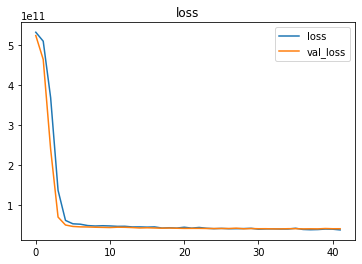

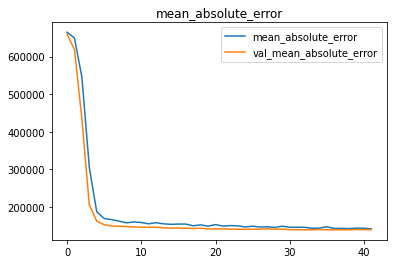

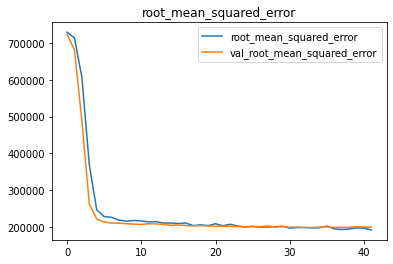

In [1807]:
# plot learning
plot_history(history);

In [1808]:
# evaluate model 
y_pred = reg_model.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

39/39 [==============================] - 0s 1ms/step
final RMSE: 199990.60508913995
final MAE: 139928.37144483806
final MAPE: 0.24258575574293534
final R2: 0.5423555465334231


###Final Model Evaluation

I am going to choose Model 3 as my recomendation.
* R^2 score is 54% while MAPE is 24%, which are the best scores out of all three models. Additionally, RMSE score is the lowest out of all three models.

* We were able to see improvement in R^2 and MAPE as hyperparameters were tuned.

Model 3 Parameters:
* Model 3 is a regression model using 2 hidden layers.
* The reason I am using a regression model is because the question we want to answer is, "How much can a house sell for?".
* 100 nodes are used for every layer while a drop out rate of 50% is applied to the two hidden layers.
* Early stopping is also used as a form of regulation.
* With these settings, the model is able to stop learning at a little over 40 epochs with very minimal loss.

Model 3 Evaluation:
* As stated before, model 3 has a very low loss rate - which is great to see.
* However, the MAPE is 24%, which is relatively high error rate. 
* This model is also only able to use 54% of the data to learn (based on R^2 score).
* Withthese scores, I think that this model is a good first start. However, I would recomend that we explore more versions to see if there is any way that we can get some better scores. I would review this model as a first draft with the stakeholders with the caveat that my recomendation would be to explore further.

